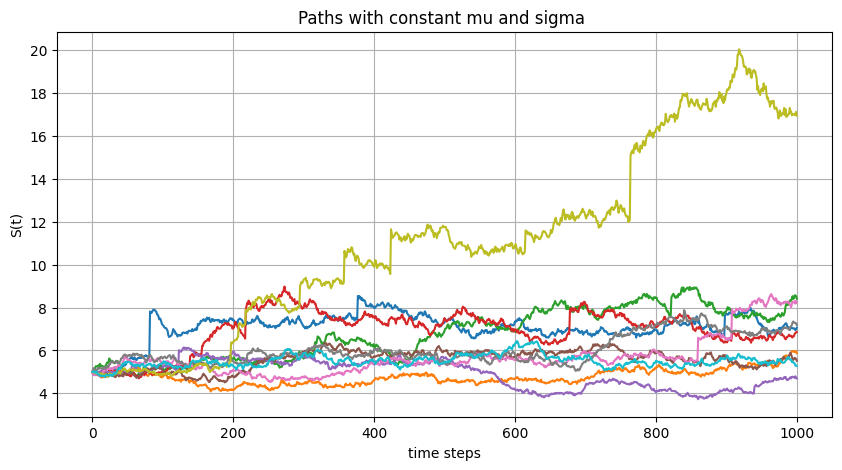

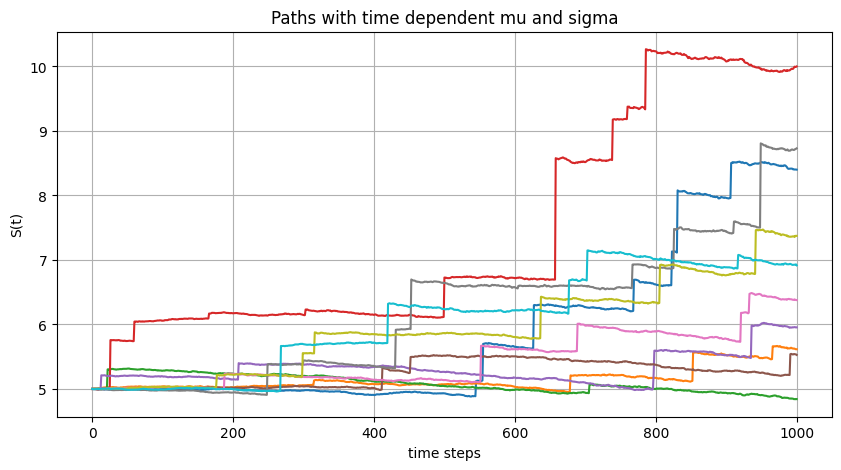

In [4]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
s_0 = 5
T = 1
mu = 0.06
sigma = 0.3
lamb=5
 
def q_t():
    z=np.random.normal(0,1)
    return 1 + abs(z)/10
 
 
def d_wt(delta_t):
    return np.random.normal(0,math.sqrt(delta_t))
 
def d_jt(delta_t):
    return np.random.poisson(lam=lamb*delta_t, size=None)
 
 
def mu_2(t):
    return 0.0325 -0.25*t
 
def sigma_2(t):
    return 0.012 + 0.0138*t - 0.00125*t*t

def jump_net(delta_t):
    num_jumps = d_jt(delta_t)
    jump_sum = 0
    for _ in range(num_jumps):
        jump_sum += (q_t() - 1)
    return jump_sum

def stimulate(m):
    arr=[]
    delta_t=T/m
    arr.append(s_0)
    for i in range(0,m):
        tmp=arr[-1]*(mu*delta_t + sigma*d_wt(delta_t) + jump_net(delta_t))
        arr.append(tmp+arr[-1])
    return arr
 
def stimulate_2(m):
    arr=[]
    delta_t=T/m
    arr.append(s_0)
    t=0
    for i in range(0,m):
        t+=delta_t
        tmp=arr[-1]*(mu_2(t)*delta_t + sigma_2(t)*d_wt(delta_t) + jump_net(delta_t))
        arr.append(tmp+arr[-1])
    return arr

M=1000
arr=[]
plt.figure(figsize=(10, 5))
for i in range(0,10):
    tmp=stimulate(M)
    arr.append(tmp)
    plt.plot(tmp)
plt.title("Paths with constant mu and sigma ")
plt.xlabel("time steps")
plt.ylabel("S(t)")
plt.grid(True)
plt.show()
# print(arr)
arr=[]
plt.figure(figsize=(10, 5))
for i in range(0,10):
    tmp=stimulate_2(M)
    arr.append(tmp)
    plt.plot(tmp)
plt.title("Paths with time dependent mu and sigma")
plt.xlabel("time steps")
plt.ylabel("S(t)")
plt.grid(True)
plt.show()
